Fresnel Number =  1300500.0000000005


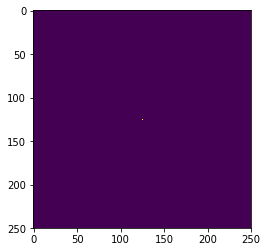

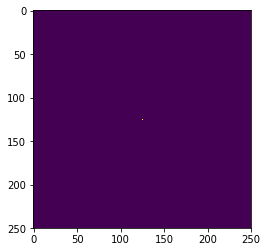

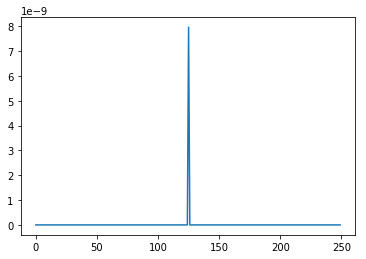

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def propTF(u1,L,lam,z):
    """ Propagation Transfer Function using Fresnel's approximation

    Args:
        u1: source plane field
        L:  width of the plane
        lam: wavelength of the monochromatic source
        z:  propagation distance
    

    Returns: u2 the observation plane field
    """
    
    m,n = u1.shape            #input array size
    dx = L/m                 #sample interval
    k = 2*np.pi/lam          #wavenumber
    fx = np.arange(-1/(2*dx),1/(2*dx),1/L,'float64')   #frequency co-ordinates
    fy = fx
    
    [FX,FY] = np.meshgrid(fx,fy)
    H = np.exp(-1j*np.pi*lam*z*(FX**2 + FY**2))#*np.exp(j*k*z)
    H = np.fft.fftshift(H)
    U1 = np.fft.fft2(np.fft.fftshift(u1))
    U2 = H*U1
    u2 = np.fft.ifftshift(np.fft.ifft2(U2))
    return u2

def rect(x):
    return (0.5*(np.sign(x+0.5) - np.sign(x-0.5)));

def main():

    # Square Beam propagation
    L1 = 0.5
    M = 250
    dx1 = L1/M
    x1 = np.arange(-L1/2,L1/2,dx1,'float64')
    y1 = x1    
    lam = 0.5*(10**-11) #0.5nm
    w = 0.00051 
    z = 0.04
    NF = (w*w)/(lam*z)
    print('Fresnel Number = ',NF)
    
    [X1,Y1] = np.meshgrid(x1,y1)

    u1 = rect(X1/(2*w))*rect(Y1/(2*w))
    plt.figure()
    plt.imshow(u1)
    u2 = propTF(u1,L1,lam,z)
    
    #Plot the Results
    plt.figure()
    plt.imshow(np.abs(u2))
    plt.figure()
    plt.plot(np.abs(u2[(M//2 + 1),:]))
    
    # Periodic Grating
    
main()
